In [1]:
#DataDiri
#Nama   : Alif Abdul Rauf
#E-mail : m184bsy1569@bangkit.academy
#Kota   : Padang

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split= 0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split= 0.4)

In [5]:
train_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/Dicoding/rockpaperscissors/", # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        subset='training',
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        "/content/drive/MyDrive/Dicoding/rockpaperscissors/", # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        subset='validation',# karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [8]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get("accuracy")> 0.97 and logs.get("val_accuracy") > 0.97):
      print("stopp")
      self.model.stop_training = True

callbacks = MyCallback()

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks]
      )

Epoch 1/100
25/25 - 34s - loss: 1.3918 - accuracy: 0.3800 - val_loss: 1.0570 - val_accuracy: 0.4500 - 34s/epoch - 1s/step
Epoch 2/100
25/25 - 22s - loss: 1.0622 - accuracy: 0.4900 - val_loss: 1.0379 - val_accuracy: 0.6000 - 22s/epoch - 871ms/step
Epoch 3/100
25/25 - 18s - loss: 1.0332 - accuracy: 0.5200 - val_loss: 1.1331 - val_accuracy: 0.3500 - 18s/epoch - 717ms/step
Epoch 4/100
25/25 - 17s - loss: 0.9338 - accuracy: 0.6200 - val_loss: 0.8291 - val_accuracy: 0.5000 - 17s/epoch - 689ms/step
Epoch 5/100
25/25 - 16s - loss: 0.8378 - accuracy: 0.6500 - val_loss: 0.8215 - val_accuracy: 0.6500 - 16s/epoch - 641ms/step
Epoch 6/100
25/25 - 14s - loss: 0.6780 - accuracy: 0.7300 - val_loss: 0.6974 - val_accuracy: 0.8000 - 14s/epoch - 556ms/step
Epoch 7/100
25/25 - 14s - loss: 0.7979 - accuracy: 0.7000 - val_loss: 0.6837 - val_accuracy: 0.8000 - 14s/epoch - 576ms/step
Epoch 8/100
25/25 - 15s - loss: 0.6555 - accuracy: 0.7700 - val_loss: 0.5020 - val_accuracy: 0.8000 - 15s/epoch - 586ms/step
Epo

Saving WhatsApp Image 2023-12-17 at 10.48.54 PM.jpeg to WhatsApp Image 2023-12-17 at 10.48.54 PM (1).jpeg
1/1 [==============================] - 0s 48ms/step
WhatsApp Image 2023-12-17 at 10.48.54 PM (1).jpeg
paper


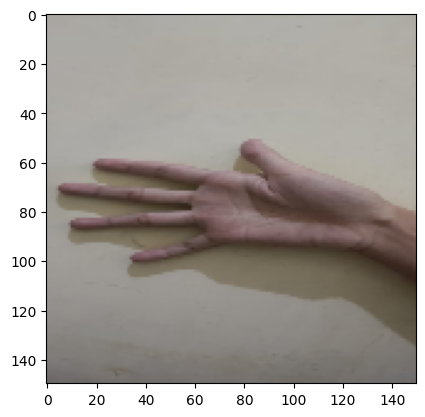

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')